## Problem Statement : 
    1.Build Predictive model if the loan has to be approved or not
    2.Run the campign which will target good customers and offer them some new loan

In [116]:
import pandas as pd

In [117]:
df = pd.read_csv("C:/Users/k9139/Downloads/CreditRisk.csv")

In [118]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [119]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [120]:
df.Credit_History = df.Credit_History.fillna(1)
df.Gender = df.Gender.fillna("Male")
df.Married= df.Married.fillna("No")
df.Dependents = df.Dependents.fillna(0)
df.Self_Employed = df.Self_Employed.fillna("Yes")
df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.LoanAmount.mean())

In [121]:
df.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.00000,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.00000,360.0,1.0,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.00000,360.0,1.0,Rural,N


In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [125]:
LE=LabelEncoder()
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(LE.fit_transform)

In [126]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,970,1,1,4.0,1,1,4009,1777.0,113.00000,360.0,1.0,2,1
977,972,1,1,0.0,0,0,4158,709.0,115.00000,360.0,1.0,2,1
978,975,1,0,0.0,0,0,3250,1993.0,126.00000,360.0,1.0,1,1
979,978,1,1,0.0,0,0,5000,2393.0,158.00000,360.0,1.0,0,0


In [127]:

df1 = df.copy()


In [128]:
df.drop(columns='Loan_ID',inplace=True)

### Sampling (Train & Test)

In [129]:

from sklearn.model_selection import train_test_split

In [130]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [132]:
print(X_train.shape)


(784, 11)


In [133]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()

In [134]:
logistic_reg.fit(X_train,y_train)

C:\Users\k9139\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
predict_cr=logistic_reg.predict(X_test)

In [136]:
predict_cr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [137]:
len(predict_cr)

197

In [138]:
y_test

920    1
448    0
894    1
871    1
521    1
      ..
201    1
705    1
401    0
44     1
385    1
Name: Loan_Status, Length: 197, dtype: int32

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
tab_cr= confusion_matrix( predict_cr,y_test) # in matrix 1st we will take predicted values. In these, we see actual values from top and predicted from left to right
tab_cr


array([[ 26,   3],
       [ 43, 125]], dtype=int64)

In [141]:
tab_cr.diagonal()

array([ 26, 125], dtype=int64)

In [142]:
tab_cr.diagonal().sum()

151

In [143]:
accuracy=tab_cr.diagonal().sum()/ tab_cr.sum()
accuracy

0.766497461928934

In [144]:

logistic_reg.coef_

array([[ 3.51931654e-01,  4.32498407e-01,  1.77951620e-01,
        -4.65318379e-02, -1.08121579e-02,  9.05209064e-06,
        -4.65002125e-05, -1.83612642e-03, -5.63856874e-03,
         1.93881739e+00,  8.19655159e-01]])

In [145]:
logistic_reg.intercept_

array([0.24342846])

In [146]:
# we did prediction in categories but we can do prediction in probability also

In [147]:
predict_probability_train=logistic_reg.predict_proba(X_train)
predict_probability_test=logistic_reg.predict_proba(X_test)

In [148]:
predict_probability_test

array([[0.26624431, 0.73375569],
       [0.72528357, 0.27471643],
       [0.26426913, 0.73573087],
       [0.10783017, 0.89216983],
       [0.22346426, 0.77653574],
       [0.4988307 , 0.5011693 ],
       [0.49456094, 0.50543906],
       [0.19127844, 0.80872156],
       [0.23420857, 0.76579143],
       [0.14980981, 0.85019019],
       [0.03515109, 0.96484891],
       [0.08881916, 0.91118084],
       [0.14737335, 0.85262665],
       [0.24602376, 0.75397624],
       [0.24170597, 0.75829403],
       [0.76734927, 0.23265073],
       [0.42559302, 0.57440698],
       [0.12703435, 0.87296565],
       [0.44760322, 0.55239678],
       [0.42964696, 0.57035304],
       [0.11543405, 0.88456595],
       [0.17775073, 0.82224927],
       [0.6187276 , 0.3812724 ],
       [0.60688453, 0.39311547],
       [0.12358667, 0.87641333],
       [0.38482121, 0.61517879],
       [0.06456176, 0.93543824],
       [0.48794054, 0.51205946],
       [0.11875275, 0.88124725],
       [0.23487729, 0.76512271],
       [0.

In [149]:
type(predict_probability_test)

numpy.ndarray

In [150]:
predict_probability_test = pd.DataFrame(predict_probability_test)

In [151]:
predict_probability_test

,0,1
0,0.266244,0.733756
1,0.725284,0.274716
2,0.264269,0.735731
3,0.107830,0.892170
4,0.223464,0.776536
...,...,...
192,0.626961,0.373039
193,0.258290,0.741710
194,0.331443,0.668557
195,0.026306,0.973694


In [152]:
predict_probability_test.rename(columns = {predict_probability_test.columns[0] : "pred_prob0" , predict_probability_test.columns[1]:"pred_prob1"}, inplace = True)

In [153]:
## AUROC CURVE

In [154]:
from sklearn.metrics import roc_auc_score , roc_curve


In [155]:
fpr , tpr , threshold = roc_curve(y_test, predict_probability_test.iloc[:,1])

In [156]:
area_auroc = roc_auc_score(y_test,predict_cr)
area_auroc

0.6766870471014492

In [157]:

import matplotlib.pyplot as plt


In [158]:
import numpy as np
area_auroc1 = np.round(area_auroc,3)
area_auroc1

0.677

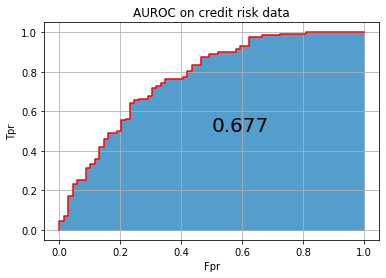

In [159]:
plt.plot(fpr,tpr, color = 'r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on credit risk data')
plt.fill_between(fpr, tpr, color='#539ecd')
plt.text(x=0.5 , y = 0.5 , s = area_auroc1 , size =  20 )
plt.grid()

In [160]:
tab_cr

array([[ 26,   3],
       [ 43, 125]], dtype=int64)

In [161]:
tab_cr.diagonal().sum() / tab_cr.sum() # for manually calculating the accuracy but we can also do...

0.766497461928934

In [162]:
from sklearn.metrics import accuracy_score


In [163]:
accuracy_score(predict_cr, y_test)      #( predicted , actual)

0.766497461928934

In [164]:
from sklearn.metrics import precision_score

In [165]:
precision_score(y_test , predict_cr) #(actual , predicted)

0.7440476190476191

In [166]:
from sklearn.metrics import f1_score

In [167]:
f1_score(y_test , predict_cr) #  as a formula (2 * 0.81305 * 0.978) / (0.81305 + 0.978  )   
                                    #that is f1_score = (2 * precisio * Recall) / (precision + Recall)

0.8445945945945945

In [168]:
from sklearn.metrics import recall_score

In [169]:
recall_score(y_test , predict_cr)   # tpr   formula tpr = Tp / Tp + Fn   ; 133 / 133 + 1

0.9765625

2.Run the campign which will target good customers and offer them some new loan

In [170]:
# campign will run on entire data

In [171]:
pred_full_data = logistic_reg.predict(df.iloc[:, 0:-1])

In [172]:
pred_full_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [173]:
pred_full_data_prob = logistic_reg.predict_proba(df.iloc[:, 0:-1])

In [174]:
pred_full_data_prob = pd.DataFrame(pred_full_data_prob)

In [175]:
pred_full_data_prob

,0,1
0,0.126211,0.873789
1,0.299206,0.700794
2,0.077898,0.922102
3,0.097707,0.902293
4,0.125755,0.874245
...,...,...
976,0.048488,0.951512
977,0.085519,0.914481
978,0.263212,0.736788
979,0.358779,0.641221


In [176]:
pred_full_data_prob.rename(columns ={pred_full_data_prob.columns[0] :"Pred_Prob0" ,
pred_full_data_prob.columns[1] :"Pred_Prob1"}, inplace= True)

In [177]:
pred_full_data_prob.head()

,Pred_Prob0,Pred_Prob1
0,0.126211,0.873789
1,0.299206,0.700794
2,0.077898,0.922102
3,0.097707,0.902293
4,0.125755,0.874245


In [178]:
pred_full_data_prob.shape

(981, 2)

In [179]:
pred_full_data_prob = pd.concat([pred_full_data_prob,df1.Loan_ID] , axis = 1)

In [180]:
pred_full_data_prob = pred_full_data_prob.iloc[:,[1,2]]

In [181]:
pred_full_data_prob.sort_values('Pred_Prob1' , ascending = False)

,Pred_Prob1,Loan_ID
68,0.991481,115
936,0.989282,877
575,0.986575,917
798,0.986560,503
497,0.985846,785
...,...,...
499,0.122739,790
677,0.115527,164
737,0.113699,313
953,0.104035,912


# lets do our over sampling

In [182]:
cr = pd.read_csv("C:/Users/k9139/Downloads/CreditRisk.csv")

# filling null values

cr.Credit_History = cr.Credit_History.fillna(1)
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna("Yes")
cr.LoanAmount = cr.LoanAmount.fillna( cr.LoanAmount.mean() )

# label encoder

cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cr.Loan_Status = le.fit_transform(cr.Loan_Status)

cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)

cr1 = cr
from sklearn.model_selection import train_test_split
cr = cr.iloc[: , 1::]
cr_train , cr_test = train_test_split(cr, test_size = .2)

In [183]:
# over sampling (os) to be done only on the train data

In [184]:
cr_train.shape

(784, 12)

In [185]:
cr_train.Loan_Status.value_counts()

1    566
0    218
Name: Loan_Status, dtype: int64

In [186]:
ab = cr_train[cr_train.Loan_Status == 0]

In [187]:
ab

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
680,1,1,0.0,1,0,4700,0.0,135.0,360.0,0.0,1,0
574,1,1,4.0,0,0,6406,0.0,150.0,360.0,1.0,1,0
166,0,1,0.0,0,0,4583,0.0,112.0,360.0,1.0,0,0
28,1,0,0.0,1,0,1442,0.0,35.0,360.0,1.0,2,0
399,0,0,0.0,0,0,1500,1800.0,103.0,360.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
788,1,1,0.0,1,0,2431,1820.0,110.0,360.0,0.0,0,0
325,1,1,1.0,0,1,8666,4983.0,376.0,360.0,0.0,0,0
150,1,0,0.0,0,0,6277,0.0,118.0,360.0,0.0,0,0
7,1,1,4.0,0,0,3036,2504.0,158.0,360.0,0.0,1,0


In [188]:
cr_train1 = pd.concat([cr_train , ab, ab])  # here if fpr and tpr is not as you requre then you can increse the ab multiple time
                                            # to fit the model

In [189]:
cr_train.shape

(784, 12)

In [190]:
cr_train.Loan_Status.value_counts()

1    566
0    218
Name: Loan_Status, dtype: int64

In [191]:
cr_train_x = cr_train1.iloc[:, 0: -1]
cr_train_y = cr_train1.iloc[: , -1]

In [192]:
cr_train1.Loan_Status.value_counts()

0    654
1    566
Name: Loan_Status, dtype: int64

In [193]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression()

In [194]:
glm.fit(cr_train_x , cr_train_y)

C:\Users\k9139\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [195]:
pred_test_new = glm.predict(X_test)

In [196]:
confusion_matrix(pred_test_new , y_test)

array([[ 44,  21],
       [ 25, 107]], dtype=int64)

In [197]:
fpr = 24 / ( 24 + 37)
fpr

0.39344262295081966

In [198]:
Tpr = 126 / (126 + 10)
Tpr

0.9264705882352942

In [199]:
precision = 126 / ( 126 + 24)


In [200]:
previous_pre = 142 / ( 142 + 32)

In [201]:
print('previous_pre : ',previous_pre)
print('--------------------------------')
print('precision : ',precision)

previous_pre :  0.8160919540229885
--------------------------------
precision :  0.84


# Decision Tree

In [202]:
cr_train_x = cr_train1.iloc[:, 0: -1]
cr_train_y = cr_train1.iloc[: , -1]

cr_test_x = cr_test.iloc[:, 0: -1]
cr_test_y = cr_test.iloc[: , -1]

In [203]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy" , max_depth = 6)

In [204]:
dt.fit(cr_train_x, cr_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [205]:
pred_dt = dt.predict(cr_test_x)

In [206]:
from sklearn.metrics import confusion_matrix

In [207]:
tab_dt = confusion_matrix(pred_dt, cr_test_y)
tab_dt

array([[ 28,  24],
       [ 23, 122]], dtype=int64)

In [208]:
feature_imp_df = pd.DataFrame({'Importance' : dt.feature_importances_ , "variables" : cr_train_x.columns})

In [209]:
feature_imp_df.sort_values('Importance', ascending = True)

,Importance,variables
0,0.000000,Gender
3,0.000000,Education
4,0.000000,Self_Employed
10,0.000000,Property_Area
8,0.019879,Loan_Amount_Term
2,0.023446,Dependents
1,0.037477,Married
6,0.058583,CoapplicantIncome
7,0.112994,LoanAmount
5,0.119253,ApplicantIncome


# Navie Bayes

In [210]:
cr = pd.read_csv("C:/Users/k9139/Downloads/CreditRisk.csv")

# filling null values

cr.Credit_History = cr.Credit_History.fillna(1)
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna("Yes")
cr.LoanAmount = cr.LoanAmount.fillna( cr.LoanAmount.mean() )

# label encoder

cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cr.Loan_Status = le.fit_transform(cr.Loan_Status)

cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)

cr1 = cr
from sklearn.model_selection import train_test_split
cr = cr.iloc[: , 1::]
cr_train , cr_test = train_test_split(cr, test_size = .2)

In [211]:
cr_train_x = cr_train1.iloc[:, 0: -1]
cr_train_y = cr_train1.iloc[: , -1]

cr_test_x = cr_test.iloc[:, 0: -1]
cr_test_y = cr_test.iloc[: , -1]

In [212]:
from sklearn.naive_bayes import MultinomialNB

In [213]:
nb_cr = MultinomialNB()

In [214]:
nb_cr.fit(cr_train_x , cr_train_y)

MultinomialNB()

In [215]:
pred_cr_nb = nb_cr.predict(cr_test_x)

In [216]:
from sklearn.metrics import confusion_matrix

In [217]:
tab_nb = confusion_matrix(pred_cr_nb , cr_test_y)
tab_nb

array([[17, 70],
       [38, 72]], dtype=int64)

# KNN

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=  7)
knn.fit(cr_train_x , cr_train_y)

KNeighborsClassifier(n_neighbors=7)

In [219]:
pred_knn = knn.predict(cr_test_x)

In [220]:
tab_knn = confusion_matrix(pred_knn,cr_test_y)

In [221]:
tab_knn

array([[ 36,  42],
       [ 19, 100]], dtype=int64)

# SVM 

In [222]:
# Data cleaning and samplig are same


In [223]:
from sklearn.svm import SVC

In [228]:
svc_cr= SVC(kernel='linear')

In [229]:
svc_cr.fit(cr_train_x, cr_train_y)

SVC(kernel='linear')

In [230]:
pred_svc = svc_cr.predict(cr_test_x)

In [231]:
tab_svc = confusion_matrix(pred_svc , cr_test_y)
tab_svc

array([[ 38,  25],
       [ 17, 117]], dtype=int64)

In [232]:
# hyper parameter tuning to check the all kernel for the best result

In [233]:
#from sklearn.model_selection import GridSearchCV

In [234]:
#search_dict ={'linear', 'poly', 'rbf', 'sigmoid'}

In [235]:
#from sklearn.svm import SVC

In [ ]:
#svc_cr = SVC()
#grid_svc = GridSearchCV(svc_cr , param_grid = search_dict)